#### DEMO Part 3 - join using GeoPandas

In [1]:
from datetime import datetime as dt
t0 = dt.utcnow()

In [2]:
%run "__DEMO Part 00.ipynb"

CPU times: user 188 ms, sys: 20 ms, total: 208 ms
Wall time: 207 ms
CPU times: user 440 ms, sys: 16 ms, total: 456 ms
Wall time: 453 ms


In [3]:
sites_gdf["SiteDB_ID"] = pd.to_numeric(sites_gdf["SiteDB_ID"], downcast='float', errors='coerce')

In [4]:
print(sites_gdf.columns)
print(slip_rate_df.columns)

Index(['OBJECTID', 'FIELD_NUMB', 'FEATURE_NA', 'METHOD', 'METHOD_ACC',
       'FAULT_FEAT', 'GEO_FEATUR', 'GEO_INFO', 'DOM_SENSE', 'SUB_SENSE',
       'DOWN_QUAD', 'DIP', 'DIP_DIR', 'NET_TREND', 'NET_PLUNGE', 'STRIKE_DIS',
       'STRIKE_TIM', 'STRIKE_SR', 'STRIKE_EVE', 'STRIKE_SED', 'VERT_DISP',
       'VERT_TIME', 'VERT_SR', 'VERT_EVENT', 'VERT_SED', 'DIP_DISP',
       'DIP_TIME', 'DIP_SR', 'DIP_EVENTS', 'DIP_SED', 'NET_DISP', 'NET_TIME',
       'NET_SR', 'NET_EVENTS', 'NET_SED', 'RI', 'LE', 'BIB_ID', 'TRACE_ID',
       'EASTING', 'NORTHING', 'POINT_ID', 'SOURCE', 'DATE_', 'CONFID',
       'ACCESS_', 'AUTHOR', 'OWNER', 'OTHER_INFO', 'POINT_X', 'POINT_Y',
       'Parameter', 'SiteDB_ID', 'geometry'],
      dtype='object')
Index(['Fault_Fault', 'Fault_CFM name', 'Fault_CFM #',
       'Fault_CFM\nSense\nDominant', 'Fault_CFM\nSense\nSecondary',
       'Fault_CFM\nDip\n(°)', 'Fault_CFM\nRake\n(°)',
       'Fault_CFM\nNet SR\n (mm/yr)', 'Fault_CFM Net SR \ncomments',
       'Site Data_Sit

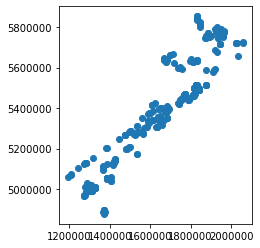

In [5]:
sites_gdf.geometry.plot()

### Prepare GeoDataframe

In [6]:
from shapely.geometry import Point
slip_rate_df["geometry"] = slip_rate_df.apply(
    lambda row: Point(row['Site Data_Easting (NZTM)'], row['Site Data_Northing (NZTM)']),
    axis = 1)

slip_rate_gdf = gpd.GeoDataFrame(slip_rate_df, geometry='geometry')
slip_rate_gdf

,Fault_Fault,Fault_CFM name,Fault_CFM #,Fault_CFM\nSense\nDominant,Fault_CFM\nSense\nSecondary,Fault_CFM\nDip\n(°),Fault_CFM\nRake\n(°),Fault_CFM\nNet SR\n (mm/yr),Fault_CFM Net SR \ncomments,Site Data_Site DB ID,...,Site Data_No. of events Min.,Site Data_No. of events Max.,Site Data_Comments regarding SR,Site Data_Comments regarding Dating,Site Data_Data source,Site Data_Last updated,Site Data_Updated by,Site Data_Last QA'd,Site Data_QA'd by,geometry
0,Vernon,Vernon 1,413.0,Reverse,Dextral,65 ± 10,290 ± 10,4.5 (2.5-5),Unchanged from 2014 AFM,1,...,NaN,NaN,Bartholomew et al. (2014) only report SR in co...,NaN,Bartholomew et al. (2014),2020-05-06,Nicola Litchfield,NaN,NaN,POINT (1685350.000 5390753.000)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,Bartholomew et al. (2014) only report SR in co...,NaN,Bartholomew et al. (2014),2020-05-06,Nicola Litchfield,NaN,NaN,POINT (1686050.032 5392467.073)
2,Vernon,Vernon 2,412.0,Dextral,NaN,80 ± 10,360 ± 10,4.5 (2.5-5),Unchanged from 2014 AFM,3,...,NaN,NaN,Bartholomew et al. (2014) only report SR in co...,OSL age uncertainties 1 sigma,Bartholomew et al. (2014),2020-05-06,Nicola Litchfield,NaN,NaN,POINT (1689691.000 5398181.000)
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,...,NaN,NaN,Bartholomew et al. (2014) only report SR in co...,OSL age uncertainties 1 sigma,Bartholomew et al. (2014),2020-05-06,Nicola Litchfield,NaN,NaN,POINT (1690022.833 5398338.833)
4,Wellington,Wellington Hut Valley 5,292.0,Dextral,Normal,65 ± 10,30 ± 10,6.3 (5.1-8.2),Unchanged from 2014 AFM,7,...,NaN,NaN,Ninis et al. (2013) only report SR in componen...,OSL age uncertainties 2 sigma,Ninis et al. (2013),2020-05-14,Nicola Litchfield,NaN,NaN,POINT (1777235.219 5448283.549)
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,...,NaN,NaN,Ages and offset from Ninis et al. (2013) using...,OSL age uncertainties 2 sigma,Ninis et al. (2013),2020-05-14,Nicola Litchfield,NaN,NaN,POINT (1777132.179 5448409.051)
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,...,NaN,NaN,Reported SR of Ninis et al. (2013) as only one...,OSL age uncertainties 2 sigma,Ninis et al. (2013),2020-05-14,Nicola Litchfield,NaN,NaN,POINT (1777343.592 5448532.222)
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,...,NaN,NaN,Reported values of Little et al. (2010) as onl...,OSL age uncertainties 1 sigma,Little et al. (2010),2020-05-15,Nicola Litchfield,NaN,NaN,POINT (1777968.141 5448830.340)


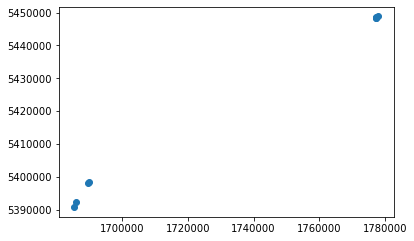

In [7]:
slip_rate_gdf.geometry.plot()

In [8]:
import itertools
from operator import itemgetter

import geopandas as gpd
import numpy as np
import pandas as pd

from scipy.spatial import cKDTree

#https://gis.stackexchange.com/a/301935

In [9]:
def ckdnearest(gdfA, gdfB, gdfB_cols=[]):
    # resetting the index of gdfA and gdfB here.
    gdfA = gdfA.reset_index(drop=True)
    gdfB = gdfB.reset_index(drop=True)
    A = np.concatenate(
        [np.array(geom.coords) for geom in gdfA.geometry.to_list()])
    B = [np.array(geom.coords) for geom in gdfB.geometry.to_list()]
    B_ix = tuple(itertools.chain.from_iterable(
        [itertools.repeat(i, x) for i, x in enumerate(list(map(len, B)))]))
    B = np.concatenate(B)
    ckd_tree = cKDTree(B)
    dist, idx = ckd_tree.query(A, k=1)
    idx = itemgetter(*idx)(B_ix)
    gdf = pd.concat(
        [gdfA, gdfB.loc[idx, gdfB_cols].reset_index(drop=True),
         pd.Series(dist, name='dist')], axis=1)
    return gdf

sr_columns = ['Site Data_Site DB ID', 
         'Site Data_Comments regarding SR',
         'Site Data_Site Name', 
         'Site Data_Easting (NZTM)', 
         'Site Data_Northing (NZTM)']

nearest_site_gdf = ckdnearest(sites_gdf, slip_rate_gdf, sr_columns)

In [10]:
nearest_site_gdf[nearest_site_gdf.dist <= 1].filter(items=['SiteDB_ID', 'Site Data_Site DB ID', 'geometry', 'dist'] + sr_columns)

,SiteDB_ID,Site Data_Site DB ID,geometry,dist,Site Data_Site DB ID,Site Data_Comments regarding SR,Site Data_Site Name,Site Data_Easting (NZTM),Site Data_Northing (NZTM)
0,1.0,1,POINT (1685350.000 5390753.000),4.112149e-06,1,Bartholomew et al. (2014) only report SR in co...,2,1.685350e+06,5.390753e+06
1,2.0,2,POINT (1686050.032 5392467.073),2.183113e-06,2,Bartholomew et al. (2014) only report SR in co...,7,1.686050e+06,5.392467e+06
3,5.0,3,POINT (1689691.000 5398181.000),6.864721e-07,3,Bartholomew et al. (2014) only report SR in co...,35; Flaxey splay,1.689691e+06,5.398181e+06
4,4.0,4,POINT (1690022.833 5398338.833),3.788416e-06,4,Bartholomew et al. (2014) only report SR in co...,43; Homestead Stream,1.690023e+06,5.398339e+06
7,8.0,8,POINT (1777132.179 5448409.051),6.322745e-07,8,Ages and offset from Ninis et al. (2013) using...,Emerald Hill; \nEHT2-T3-T4,1.777132e+06,5.448409e+06
8,9.0,9,POINT (1777343.592 5448532.222),2.241761e-07,9,Reported SR of Ninis et al. (2013) as only one...,Emerald Hill;\nEHT2-T3,1.777344e+06,5.448532e+06
10,11.0,11,POINT (1777968.141 5448830.340),5.180327e-07,11,Reported values of Little et al. (2010) as onl...,Te Marua terraces,1.777968e+06,5.448830e+06


In [11]:
nzafd_gdf[nzafd_gdf.index==0]

,NAME,REC_INTERV,SECTION,AUTHOR,SOURCE,ACCURACY,DOWNQUAD,SLIPRATE,SUBSLIPTYP,DIP,DISPLACEME,LASTEVENT,DOMSLIPTYP,DIPDIRECTI,EVENT,geometry
0,Wairoa North Fault,None,None,None,None,Accurate,SW,Unknown,Unknown,Unknown,Unknown,Unknown,Normal,W,None,"LINESTRING (1786021.356 5894921.191, 1786101.6..."


In [12]:
nzafd_sections_gdf = nzafd_gdf.explode()

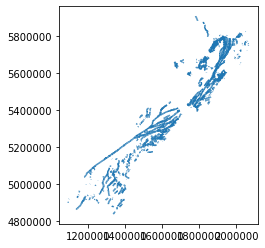

In [13]:
nzafd_gdf.geometry.plot()

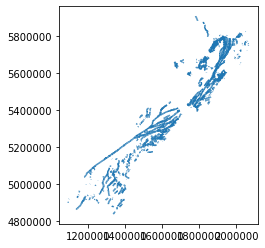

In [14]:
nzafd_sections_gdf.geometry.plot()

In [15]:
#nzafd_sections_gdf[nzafd_sections_gdf['SECTION'] == 'Virginia Fault Zone'].filter(items=['geometry', 'SECTION'])

In [16]:
#nzafd_sections_gdf.count()

In [17]:
#help(nzafd_sections_gdf.index.to_flat_index)


In [18]:
nzafd_sections_gdf.index = nzafd_sections_gdf.index.to_flat_index()

nzafd_sections_gdf[nzafd_sections_gdf.index == (1426,1)]

,NAME,REC_INTERV,SECTION,AUTHOR,SOURCE,ACCURACY,DOWNQUAD,SLIPRATE,SUBSLIPTYP,DIP,DISPLACEME,LASTEVENT,DOMSLIPTYP,DIPDIRECTI,EVENT,geometry
"(1426, 1)",Paparoa Point Fault,None,None,None,Kaikoura 2016,Accurate,Unknown,Unknown,Unknown,Unknown,Unknown,Historical,Unknown,Unknown,Kaikoura 2016,"LINESTRING (1669851.319 5323887.056, 1669985.5..."


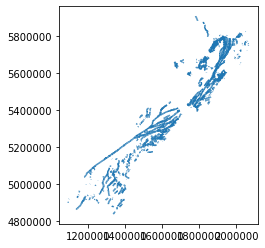

In [29]:
nzafd_sections_gdf['nzafd_index'] = nzafd_sections_gdf.index.to_series()
nzafd_sections_gdf['nzafd_geometry'] = gpd.GeoSeries(nzafd_sections_gdf.geometry.copy())
nzafd_gdf.geometry.plot()

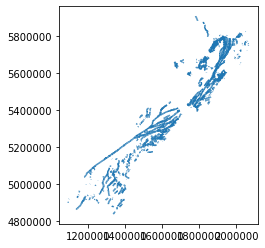

In [33]:
#help(nzafd_sections_gdf["nzafd_geometry"])


In [20]:
nearest_site_gdf.rename(columns={"dist": "dist_site"}, inplace=True)
nearest_section_gdf = ckdnearest(nearest_site_gdf[nearest_site_gdf.dist_site <= 1], nzafd_sections_gdf, ['NAME', 'EVENT', 'nzafd_index', 'nzafd_geometry'])

#help(c.dist)
#nzafd_sections_gdf.columns.duplicated()

#nearest_fault_gdf.filter(items=['nzafd_index','geometry', 'SECTION'])
# print(nzafd_sections_gdf.columns.to_list())
#print(c.columns)
# print(nearest_fault_gdf.columns)

nearest_section_gdf.columns.duplicated()
nearest_section_gdf.filter(items=['nzafd_index', 'SiteDB_ID', 'Site Data_Site DB ID', #indices
                                'nzafd_geometry',
                                'OWNER',
                                'NAME', 'EVENT', 'geometry', 'dist_site', 'dist',
                                'Site Data_Comments regarding SR', 'Site Data_Site Name'])

,nzafd_index,SiteDB_ID,Site Data_Site DB ID,nzafd_geometry,OWNER,NAME,EVENT,geometry,dist_site,dist,Site Data_Comments regarding SR,Site Data_Site Name
0,"(5338, 0)",1.0,1,"LINESTRING (1685376.386 5390429.167, 1685376.1...","GNS, Victoria University",Vernon Fault,None,POINT (1685350.000 5390753.000),4.112149e-06,83.989293,Bartholomew et al. (2014) only report SR in co...,2
1,"(5333, 0)",2.0,2,"LINESTRING (1686175.772 5392865.999, 1686138.0...","GNS, Victoria University",Vernon Fault,None,POINT (1686050.032 5392467.073),2.183113e-06,56.717159,Bartholomew et al. (2014) only report SR in co...,7
2,"(5315, 0)",5.0,3,"LINESTRING (1690804.155 5398545.141, 1690468.7...","GNS, Victoria University",Vernon Fault,None,POINT (1689691.000 5398181.000),6.864721e-07,61.219768,Bartholomew et al. (2014) only report SR in co...,35; Flaxey splay
3,"(5315, 0)",4.0,4,"LINESTRING (1690804.155 5398545.141, 1690468.7...","GNS, Victoria University",Vernon Fault,None,POINT (1690022.833 5398338.833),3.788416e-06,136.394049,Bartholomew et al. (2014) only report SR in co...,43; Homestead Stream
4,"(4162, 0)",8.0,8,"LINESTRING (1776968.115 5448333.931, 1777054.4...","GNS, Victoria University",Wellington Fault,None,POINT (1777132.179 5448409.051),6.322745e-07,82.681352,Ages and offset from Ninis et al. (2013) using...,Emerald Hill; \nEHT2-T3-T4
5,"(4351, 0)",9.0,9,"LINESTRING (1777204.618 5448449.418, 1777321.1...","GNS, Victoria University",Wellington Fault,None,POINT (1777343.592 5448532.222),2.241761e-07,32.641461,Reported SR of Ninis et al. (2013) as only one...,Emerald Hill;\nEHT2-T3
6,"(2990, 0)",11.0,11,"LINESTRING (1778112.108 5448892.298, 1778038.8...","GNS, Victoria University",Wellington Fault,None,POINT (1777968.141 5448830.340),5.180327e-07,38.397335,Reported values of Little et al. (2010) as onl...,Te Marua terraces


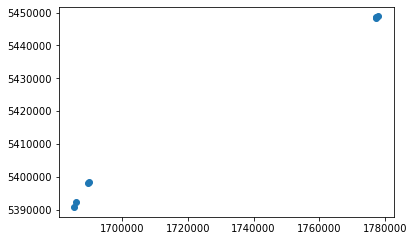

In [21]:
nearest_section_gdf.geometry.plot()

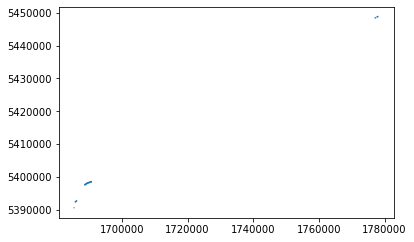

In [34]:
myseries = gpd.GeoSeries(nearest_section_gdf.nzafd_geometry.copy())
myseries.plot()